<a href="https://colab.research.google.com/github/AbhijeetBeedikar/YUVAi-Waste-Segregation-System/blob/main/YUVAi_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 16.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8m-seg.pt")


100%|██████████| 52.4M/52.4M [00:01<00:00, 32.5MB/s]


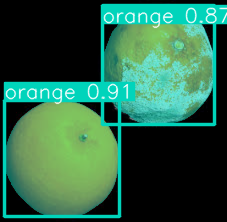

In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])


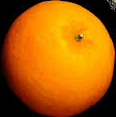

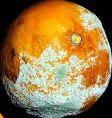

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
bio = cv2.imread('/content/biological489.jpg')
for a in cord:
  cv2.imwrite(bio[a[1]:a[3],a[0]:a[2]])


In [ ]:
import pandas as pd
import os
import cv2
number = 4997
garbage_images = pd.read_csv('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/garbage_images.csv',index_col=0)
for c in os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes')[1000:]:
  os.chdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes')
  try:
    results = model.predict(c)
    result = results[0]
    cord = []
    for box in result.boxes:
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      cord.append(cords)
    img = cv2.imread('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes/'+c)

    for z in cord:
      garbage_images.loc[number] = [c,z[0],z[1],z[2],z[3],b,img.shape[0],img.shape[1]]
      os.chdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification')
      garbage_images.to_csv('garbage_images.csv')
      number += 1
      if number == 6025:
        raise KeyboardInterrupt
  except FileNotFoundError:
    if 4264 - os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes').index(c) <= 3:
      pass
    else:
      raise FileNotFoundError



image 1/1 /content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes/train - clothes1569.jpg: 640x640 1 person, 3364.6ms
Speed: 5.3ms preprocess, 3364.6ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes/train - clothes549.jpg: 640x480 1 person, 2384.4ms
Speed: 4.0ms preprocess, 2384.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes/train - clothes1098.jpg: 640x480 1 person, 1613.0ms
Speed: 3.3ms preprocess, 1613.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/train/clothes/train - clothes921.jpg: 640x544 1 bed, 1794.4ms
Speed: 4.6ms preprocess

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import os
a = pd.DataFrame(columns =['img_name','xmin','ymin','xmax','ymax','category','height','width'])
os.chdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification')
a.to_csv('garbage_images.csv')


In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/roboflow data yolov3 format/test/images')))

933


In [ ]:
#to delete all entries into garbage_images.csv that do not exist anymore in the training data folders
import os
final_images = []
for a in ['test','train','valid(1)']:
  for b in os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a):
    final_images += os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a+'/'+b)
garbage_images.loc[garbage_images['img_name'] in final_images]



NameError: ignored

In [ ]:
for a in ['test','train','valid']:
  for b in os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a):
    os.chdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a+'/'+b)
    for c in os.listdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a+'/'+b):
      results = model.predict(c)
      result = results[0]
      cord = []
      for box in result.boxes:
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        cord.append(cords)
      img = cv2.imread('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a+'/'+b+'/'+c)
      for a in cord:
        os.chdir('/content/drive/MyDrive/12 groups garbage classification data - cleaned/garbage_classification/'+a+'(1)/'+b)
        cv2.imwrite(c,img[a[1]:a[3],a[0]:a[2]])

In [ ]:
#def csv_to_xml(b):
import os
os.chdir('C:/Users/Pralhad/Downloads/xml annotations')
for a in list(b['img_file'].unique()):
  d = b.loc[b['img_file']==a].reset_index()
  str1 = '''<annotation>
    <folder></folder>
    <filename>{}</filename>
    <path>{}</path>
    <source>
        <database> Unknown </database>
    </source>
    <size>
        <width>{}</width>
        <height>{}</height>
        <depth> 3 </depth>
    </size>
    <segmented> 0 </segemented>'''.format(d['img_file'][0],d['img_file'][0],d['img_width'][0],d['img_height'][0])

  for c in range(len(d)):
    str1 += '''    <object>
        <name> {} </name>
        <pose> Unspecified </pose>
        <truncated> 0 </truncated>
        <difficult> 0 </difficult>
        <occluded> 0 </occluded>
        <bndbox>
            <xmin>{}</xmin>
            <xmax>{}</xmax>
            <ymin>{}</ymin>
            <ymax>{}</ymax>
        </bndbox>
    </object>'''.format(d['cat_name'][c],d['x'][c],d['x_max'][c],d['y'][c],d['y_max'][c])
  b_xml = str1
  with open(d['img_file'][0]+".xml", "wb") as f:
    f.write(b_xml)

<annotation>
    <folder></folder>
    <filename>batch_1-000008.jpg</filename>
    <path>batch_1-000008.jpg</path>
    <source>
        <database> Unknown </database>
    </source>
    <size>
        <width>1537</width>
        <height>2049</height>
        <depth> 3 </depth>
    </size>
    <segmented> 0 </segemented>    <object>
        <name> Meal carton </name>
        <pose> Unspecified </pose>
        <truncated> 0 </truncated>
        <difficult> 0 </difficult>
        <occluded> 0 </occluded>
        <bndbox>
            <xmin>1.0</xmin>
            <xmax>1430.0</xmax>
            <ymin>457.0</ymin>
            <ymax>1976.0</ymax>
        </bndbox>
    </object>    <object>
        <name> Other carton </name>
        <pose> Unspecified </pose>
        <truncated> 0 </truncated>
        <difficult> 0 </difficult>
        <occluded> 0 </occluded>
        <bndbox>
            <xmin>531.0</xmin>
            <xmax>1537.0</xmax>
            <ymin>292.0</ymin>
            <ymax>964.0<

In [ ]:
b_xml = bytes('''<annotation>
    <folder></folder>
    <filename>batch_1-000008.jpg</filename>
    <path>batch_1-000008.jpg</path>
    <source>
        <database> Unknown </database>
    </source>
    <size>
        <width>1537</width>
        <height>2049</height>
        <depth> 3 </depth>
    </size>
    <segmented> 0 </segemented>
    <object>
        <name> Meal carton </name>
        <pose> Unspecified </pose>
        <truncated> 0 </truncated>
        <difficult> 0 </difficult>
        <occluded> 0 </occluded>
        <bndbox>
            <xmin>1.0</xmin>
            <xmax>1430.0</xmax>
            <ymin>457.0</ymin>
            <ymax>1976.0</ymax>
        </bndbox>
    </object>
    <object>
        <name> Other carton </name>
        <pose> Unspecified </pose>
        <truncated> 0 </truncated>
        <difficult> 0 </difficult>
        <occluded> 0 </occluded>
        <bndbox>
            <xmin>531.0</xmin>
            <xmax>1537.0</xmax>
            <ymin>292.0</ymin>
            <ymax>964.0</ymax>
        </bndbox>
    </object>''', 'utf-8')
with open("GFG.xml", "wb") as f:
  f.write(b_xml)